In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten
from tensorflow.keras.models import Model
import pandas as pd
import tensorflow as tf
import scipy.io as sio
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, UpSampling2D, concatenate
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import backend as Ks
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
import os



In [24]:
import tensorflow as tf
#from tensorflow.contrib.layers.python.layers import initializers
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import scipy.io
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import skimage
from tensorflow.keras import losses
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
import MiniNetMiscnnV2

In [25]:
import scipy.io
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import skimage
from tensorflow.keras import losses
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
import modelFCdDNN
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# Load model

In [4]:
model=MiniNetMiscnnV2.Architecture().create_model_3D(input_shape=(256,256,1))
model.summary()
#line 138 --> changed n_filters to 1
#added command upsamling=2
#in upsampling layer n_filter=n_labels
# resize.bilinear command changed. 


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 13) 117         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128, 128, 14) 0           conv2d[0][0]                     
                                                                 max_pooling2d[0][0]          

In [5]:
def customLoss(yTrue,yPred):
    return (1e4)*(Ks.mean(Ks.square(yPred - yTrue), axis=-1))


IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
N_TRAIN_SAMPLES = 3120
CHANNELS = 1
N_EVALUATE_SAMPLES = 821
N_TESTING_SAMPLES = 695
EVALUATE_FROM = 1
EPOCHS = 100
LEARNING_RATE = 0.0001
F = 64

# Data generator


In [26]:
def CustomImgGenSC(path_train_input,path_train_output,indlst_train,\
                   df_train_input,df_train_output,\
                   H=256,W=256,onlyX=False,shuffle=False,BATCH_SIZE=16):
    L_train = len(indlst_train)
    while True:
        if(shuffle):
            random.shuffle(indlst_train)
        ii = 0 # Current image index
        left = L_train
        while left>0:
            BL = min(BATCH_SIZE,left)
            X_BATCH = np.zeros((BL,H,W,1))
            Y_BATCH = np.zeros((BL,H,W,1))
            for bi in range(BL):
                os.chdir(path_train_input)
                imgIdx = indlst_train[ii] 
                pathr = 'Image'+str(imgIdx).zfill(5)+'.mat'
                x = sio.loadmat(pathr)
                X_BATCH[bi,:,:,0] = x['U']/255.0          
                
                if(not onlyX):
                    os.chdir(path_train_output)
                    pathr = 'Segment'+str(imgIdx).zfill(5)+'.mat'
                    x = sio.loadmat(pathr)
                    Y_BATCH[bi,:,:,0] = x['S']/255.0
                ii+=1
                
            left = left - BL
            if(not onlyX):
                yield (X_BATCH,Y_BATCH)
            else:
                yield X_BATCH


# Load Papillary data

In [27]:
path_train_input = "/media/beta/navchetan-beps/Lars_BEP/Training sets/Inputs" 
path_train_output = "/media/beta/navchetan-beps/Lars_BEP/Training sets/Inner"
path = "/media/beta/navchetan-beps/Lars_BEP/Training sets"
os.chdir(path)
indlist_train_input = list(pd.read_csv('Training_indices.csv')['Indices'])
#print(indlist_train_input)
csvFileTrain_Input = 'Training_Input.csv'
df_train_input = pd.read_csv(csvFileTrain_Input)
csvFileTrain_Output = 'Training_Output.csv' #training with papillary
df_train_output = pd.read_csv(csvFileTrain_Output)
BS = 8

In [28]:
train_generator = CustomImgGenSC(path_train_input,path_train_output,indlist_train_input\
                                 ,df_train_input,df_train_output\
                                 ,H=256,W=256,onlyX=False,shuffle=False,BATCH_SIZE=BS)


# Load papillary validation

In [29]:
path_validation_input = "/media/beta/navchetan-beps/Lars_BEP/Validation sets/Inputs"
path_validation_output = "/media/beta/navchetan-beps/Lars_BEP/Validation sets/Inner"
path = "/media/beta/navchetan-beps/Lars_BEP/Validation sets"
os.chdir(path)
indlist_validation_input = list(pd.read_csv('Validation_indices.csv')['Indices'].values)
#print(indlist_validation_input)
# indlist_validation_output = list(pd.read_csv('Training_indices.csv')['Indices'].values)
csvFilevalidation_Input = 'Validation_Input.csv'
df_validation_input = pd.read_csv(csvFilevalidation_Input)
csvFilevalidation_Output = 'Validation_Output.csv'
df_validation_output = pd.read_csv(csvFilevalidation_Output)
BS = 16

In [30]:
validation_generator = CustomImgGenSC(path_validation_input,path_validation_output,indlist_validation_input\
                                 ,df_validation_input,df_validation_output\
                                 ,H=256,W=256,onlyX=False,shuffle=False,BATCH_SIZE=BS)

# Load no papillary validation

# Old

In [15]:


# # load the  data for experiment 1 in the manuscript

data = scipy.io.loadmat('train1.mat')
inp  = data['inp']
lab=data['lab']
lab.shape
traininp =np.reshape(np.transpose(inp,(2,0,1)),(100,512,512,1))
trainlab =np.reshape(np.transpose(lab,(2,0,1)),(100,512,512,1))


FileNotFoundError: [Errno 2] No such file or directory: 'train1.mat'

In [ ]:
x=traininp/2
y=trainlab/2

In [ ]:
X_n = x[10,:,:,0]
Y_n = y[10,:,:,0]
plt.imshow(Y_n,cmap='gray')

In [ ]:
np.amax(Y_n)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(x , y , test_size = 0.2 , random_state = 42)

# Focal loss

In [10]:
beta = 0.5
alpha = 0.35
gamma = 2
epsilon = 1e-5
smooth = 1
def focal_loss_with_logits(logits, targets, alpha, gamma, y_pred):
    weight_a = alpha * (1 - y_pred) ** gamma * targets
    weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)

    return (tf.math.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(
        -logits)) * (weight_a + weight_b) + logits * weight_b
    
def focal_loss(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(),
                                  1 - tf.keras.backend.epsilon())
    logits = tf.math.log(y_pred / (1 - y_pred))

    loss = focal_loss_with_logits(logits=logits, targets=y_true,
                                    alpha=alpha, gamma=gamma, y_pred=y_pred)

    return tf.reduce_mean(loss)

# Training


In [11]:
path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Trained"           
os.chdir(path)
os.getcwd()

'/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Trained'

In [31]:
import math
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
batch_size = 8
N_TRAIN=len(indlist_train_input)
N_VALIDATE=len(indlist_validation_input)
# N_TEST=len(indlist_testing_input)
    
t_steps = math.ceil(N_TRAIN/batch_size)
v_steps = math.ceil(N_VALIDATE/batch_size)
# tt_steps = math.ceil(N_TEST/batch_size)

min_lr=0.0001
epochs=300
LR_patience=20
LR_factor=0.1
stop_patience=100
decay_rate=min_lr/epochs
retrainFlag=False
modelName = 'MiniNetIn300'
model_filepath = modelName + '.json'
weights_filepath = modelName + '_weights.hdf5'
saveFolder='/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Trained'
#model_json = model.to_json() # serialize model to JSON
#with open(model_filepath, 'w') as json_file:
#    json_file.write(model_json)

modelSave = saveFolder + '/' + modelName + '.h5'
callbacks = [EarlyStopping(patience=stop_patience, verbose=1),
                 ReduceLROnPlateau(factor=LR_factor, patience=LR_patience, min_lr=min_lr, verbose=1),
                 ModelCheckpoint(modelSave, verbose=1, save_best_only=True, save_weights_only=False)]

In [32]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001, decay=decay_rate),
             loss = "binary_crossentropy",
             metrics = ['accuracy'])
results = model.fit_generator(train_generator, steps_per_epoch=t_steps, epochs=epochs,use_multiprocessing=False, workers=0,validation_data=validation_generator,validation_steps=v_steps,callbacks=callbacks, shuffle=False)

/home/lars-bep/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
169/169 [==============================] - 28s 129ms/step - loss: 0.1431 - accuracy: 0.9889 - val_loss: 0.1661 - val_accuracy: 0.9828

Epoch 00001: val_loss improved from inf to 0.16613, saving model to /media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Trained/MiniNetIn300.h5
Epoch 2/300
169/169 [==============================] - 20s 121ms/step - loss: 0.1423 - accuracy: 0.9893 - val_loss: 0.1680 - val_accuracy: 0.9815

Epoch 00002: val_loss did not improve from 0.16613
Epoch 3/300
169/169 [==============================] - 22s 129ms/step - loss: 0.1411 - accuracy: 0.9890 - val_loss: 0.1614 - val_accuracy: 0.9827

Epoch 00003: val_loss improved from 0.16613 to 0.16139, saving model to /media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Trained/MiniNetIn300.h5
Epoch 4/300
169/169 [==============================] - 21s 123ms/step - loss: 0.1387 - accuracy: 0.9892 - val_loss: 0.1615 - val_accuracy: 0.9822

Epoch 00004: val_loss did not improve from 0.16139
Epoch 5/


Epoch 00040: val_loss did not improve from 0.16049
Epoch 41/300
169/169 [==============================] - 21s 122ms/step - loss: 0.1101 - accuracy: 0.9906 - val_loss: 0.1822 - val_accuracy: 0.9785

Epoch 00041: val_loss did not improve from 0.16049
Epoch 42/300
169/169 [==============================] - 21s 122ms/step - loss: 0.1082 - accuracy: 0.9910 - val_loss: 0.2178 - val_accuracy: 0.9723

Epoch 00042: val_loss did not improve from 0.16049
Epoch 43/300
169/169 [==============================] - 21s 122ms/step - loss: 0.1139 - accuracy: 0.9893 - val_loss: 0.1626 - val_accuracy: 0.9783

Epoch 00043: val_loss did not improve from 0.16049
Epoch 44/300
169/169 [==============================] - 21s 122ms/step - loss: 0.1101 - accuracy: 0.9902 - val_loss: 0.2110 - val_accuracy: 0.9757

Epoch 00044: val_loss did not improve from 0.16049
Epoch 45/300
169/169 [==============================] - 21s 123ms/step - loss: 0.1093 - accuracy: 0.9902 - val_loss: 0.2156 - val_accuracy: 0.9737

Epoc

169/169 [==============================] - 21s 124ms/step - loss: 0.0952 - accuracy: 0.9900 - val_loss: 0.2276 - val_accuracy: 0.9700

Epoch 00081: val_loss did not improve from 0.13777
Epoch 82/300
169/169 [==============================] - 21s 123ms/step - loss: 0.0944 - accuracy: 0.9899 - val_loss: 0.2800 - val_accuracy: 0.9670

Epoch 00082: val_loss did not improve from 0.13777
Epoch 83/300
169/169 [==============================] - 21s 124ms/step - loss: 0.0938 - accuracy: 0.9901 - val_loss: 0.2467 - val_accuracy: 0.9707

Epoch 00083: val_loss did not improve from 0.13777
Epoch 84/300
169/169 [==============================] - 21s 123ms/step - loss: 0.0908 - accuracy: 0.9909 - val_loss: 0.2742 - val_accuracy: 0.9687

Epoch 00084: val_loss did not improve from 0.13777
Epoch 85/300
169/169 [==============================] - 21s 122ms/step - loss: 0.0896 - accuracy: 0.9912 - val_loss: 0.2413 - val_accuracy: 0.9714

Epoch 00085: val_loss did not improve from 0.13777
Epoch 86/300
169/1


Epoch 00121: val_loss improved from 0.13322 to 0.13042, saving model to /media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Trained/MiniNetIn300.h5
Epoch 122/300
169/169 [==============================] - 21s 125ms/step - loss: 0.0839 - accuracy: 0.9911 - val_loss: 0.1647 - val_accuracy: 0.9771

Epoch 00122: val_loss did not improve from 0.13042
Epoch 123/300
169/169 [==============================] - 22s 128ms/step - loss: 0.0824 - accuracy: 0.9910 - val_loss: 0.1147 - val_accuracy: 0.9817

Epoch 00123: val_loss improved from 0.13042 to 0.11473, saving model to /media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Trained/MiniNetIn300.h5
Epoch 124/300
169/169 [==============================] - 21s 125ms/step - loss: 0.0894 - accuracy: 0.9891 - val_loss: 0.1525 - val_accuracy: 0.9771

Epoch 00124: val_loss did not improve from 0.11473
Epoch 125/300
169/169 [==============================] - 21s 126ms/step - loss: 0.0830 - accuracy: 0.9912 - val_loss: 0.1135 - val_accuracy: 0.9

169/169 [==============================] - 21s 127ms/step - loss: 0.0726 - accuracy: 0.9918 - val_loss: 0.1647 - val_accuracy: 0.9759

Epoch 00161: val_loss did not improve from 0.11353
Epoch 162/300
169/169 [==============================] - 22s 128ms/step - loss: 0.0714 - accuracy: 0.9922 - val_loss: 0.1677 - val_accuracy: 0.9766

Epoch 00162: val_loss did not improve from 0.11353
Epoch 163/300
169/169 [==============================] - 21s 126ms/step - loss: 0.0707 - accuracy: 0.9925 - val_loss: 0.1650 - val_accuracy: 0.9767

Epoch 00163: val_loss did not improve from 0.11353
Epoch 164/300
169/169 [==============================] - 21s 126ms/step - loss: 0.0700 - accuracy: 0.9927 - val_loss: 0.1808 - val_accuracy: 0.9753

Epoch 00164: val_loss did not improve from 0.11353
Epoch 165/300
169/169 [==============================] - 21s 127ms/step - loss: 0.0704 - accuracy: 0.9925 - val_loss: 0.1742 - val_accuracy: 0.9736

Epoch 00165: val_loss did not improve from 0.11353
Epoch 166/300


169/169 [==============================] - 21s 126ms/step - loss: 0.0646 - accuracy: 0.9933 - val_loss: 0.2224 - val_accuracy: 0.9740

Epoch 00202: val_loss did not improve from 0.11353
Epoch 203/300
169/169 [==============================] - 21s 124ms/step - loss: 0.0637 - accuracy: 0.9936 - val_loss: 0.1826 - val_accuracy: 0.9764

Epoch 00203: val_loss did not improve from 0.11353
Epoch 204/300
169/169 [==============================] - 21s 125ms/step - loss: 0.0637 - accuracy: 0.9935 - val_loss: 0.2149 - val_accuracy: 0.9744

Epoch 00204: val_loss did not improve from 0.11353
Epoch 205/300
169/169 [==============================] - 21s 125ms/step - loss: 0.0628 - accuracy: 0.9938 - val_loss: 0.2139 - val_accuracy: 0.9747

Epoch 00205: val_loss did not improve from 0.11353
Epoch 206/300
169/169 [==============================] - 21s 126ms/step - loss: 0.0862 - accuracy: 0.9897 - val_loss: 0.2346 - val_accuracy: 0.9703

Epoch 00206: val_loss did not improve from 0.11353
Epoch 207/300


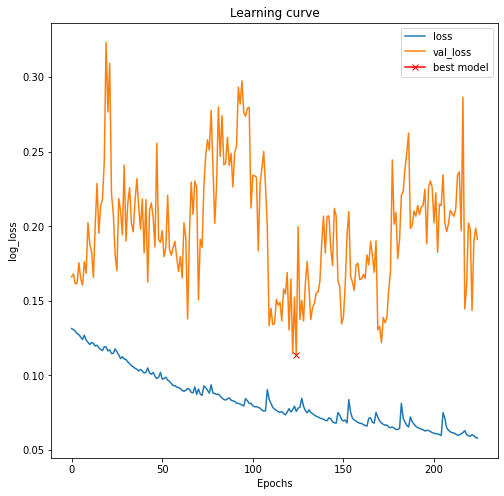

In [33]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

# Testing

In [34]:
import os
import math
import pandas as pd
path_testing_input = "/media/beta/navchetan-beps/Lars_BEP/Test sets/Input"
path_testing_output = "/media/beta/navchetan-beps/Lars_BEP/Test sets/Inner"
path = "/media/beta/navchetan-beps/Lars_BEP/Test sets"
os.chdir(path)
indlist_testing_input = list(pd.read_csv('Testing_indices.csv')['Indices'].values)
# indlist_validation_output = list(pd.read_csv('Training_indices.csv')['Indices'].values)
csvFiletesting_Input = 'Testing_Input.csv'
df_testing_input = pd.read_csv(csvFiletesting_Input)
csvFiletesting_Output = 'Test_Output.csv'
df_testing_output = pd.read_csv(csvFiletesting_Output)
BS = 8

N_PRED=len(indlist_testing_input)
pred_steps = math.ceil(N_PRED/batch_size)
    


pred_X_generator = CustomImgGenSC(path_testing_input,path_testing_output,indlist_testing_input\
                                 ,df_testing_input,df_testing_output\
                                 ,H=256,W=256,onlyX=True,shuffle=False,BATCH_SIZE=BS)
    
# path = "/data/navchetan/Data/Testing"
# os.chdir(path)

# Create and save result matrix batch by batch
a = 0
print('Running prediction Steps.. ' + str(pred_steps))
count = 0
for step in range(pred_steps): 
    pred_Y_predict = model.predict_generator(pred_X_generator,steps=1,use_multiprocessing=False,workers=0)
    print(step,end=" ")
    b = np.shape(pred_Y_predict)[0]
    short_lst = indlist_testing_input[a:a+b]
    a+=b
    pos = 0
    path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_inner"
    os.chdir(path)
    for i in short_lst:
        S = pred_Y_predict[pos,:,:,0]
        pos+=1
        count = count + 1
        fsave = 'Segment_Output'+str(count).zfill(5)+'.mat'
        sio.savemat(fsave, {'S':S})
        

Running prediction Steps.. 35
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 

In [35]:
import os
import pandas as pd
import scipy.io as sio
import cv2
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix


cols = ['sensitivity','specificity','accuracy','dice_score','Jaccard']
df = pd.DataFrame(columns=cols)
path_segment ="/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_inner"
path_testing_ground_truth ="/media/beta/navchetan-beps/Lars_BEP/Test sets/Inner"
N_TESTING_SAMPLES = 213
print('Loading Testing Data for computation of Jaccard Index')
sensitivity_t = 0
specificity_t = 0
accuracy_t = 0
dice_score_t = 0
Jaccard_t = 0
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    os.chdir(path_segment)    
    pathr = 'Segment_Output'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Segment_model = x['S']
    Segment_model1 = Segment_model*255;
    retval1, Segment_model_threshold = cv2.threshold(Segment_model1,100,255,cv2.THRESH_BINARY)
    Segment_model_threshold1 = Segment_model_threshold/255.0
    
    os.chdir(path_testing_ground_truth)
    path_t = 'Segment'+str(i+1).zfill(5)+'.mat'
    y = sio.loadmat(path_t)
    ground_truth_testing  = y['S']
    ground_truth1 = ground_truth_testing*255;
    retval2, ground_truth_testing_threshold = cv2.threshold(ground_truth1,0,255,cv2.THRESH_BINARY)
    ground_truth_testing_threshold1 = ground_truth_testing_threshold/255.0

    mcm = confusion_matrix(np.ndarray.flatten(Segment_model_threshold1),np.ndarray.flatten(ground_truth_testing_threshold1))
    tn = mcm[0, 0]
    fp = mcm[0, 1]
    fn = mcm[1, 0]
    tp = mcm[1, 1]
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fn + fp)
    dice_score = 2*tp / (2*tp + fp + fn)
    Jaccard = dice_score / (2-dice_score)
    
    sensitivity_t = sensitivity_t + sensitivity
    specificity_t = specificity_t + specificity
    accuracy_t = accuracy_t + accuracy
    dice_score_t = dice_score_t + dice_score
    Jaccard_t = Jaccard_t + Jaccard
    
    
    df = df.append(pd.Series([sensitivity,specificity,accuracy,dice_score,Jaccard],index=df.columns), ignore_index=True)

path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet"
os.chdir(path)
df.to_csv('Metrics_Mininet_inner.csv',index=False)
print(sensitivity_t/N_TESTING_SAMPLES)
print(specificity_t/N_TESTING_SAMPLES)
print(dice_score_t/N_TESTING_SAMPLES)
print(accuracy_t/N_TESTING_SAMPLES)
print(Jaccard_t/N_TESTING_SAMPLES)

Loading Testing Data for computation of Jaccard Index
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0.8049075835391065
0.9915166910310959
0.8233714838431223
0.9811339042556118
0.7142883598856707


In [36]:
O1 = np.zeros((N_TESTING_SAMPLES,256,256))
O2 = np.zeros((N_TESTING_SAMPLES,256,256))
Ground_Truth = np.zeros((N_TESTING_SAMPLES,256,256))
Segmentation_from_model = np.zeros((N_TESTING_SAMPLES,256,256))

path = "/media/beta/navchetan-beps/Lars_BEP/Test sets/Input"
os.chdir(path)
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    pathr = 'Image'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    O1[i,:,:] = x['U']/255
    O2[i,:,:] = x['U']/255
    
path = "/media/beta/navchetan-beps/Lars_BEP/Test sets/Inner" #change directory
os.chdir(path)
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    pathr = 'Segment'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Ground_Truth[i,:,:] = x['S']
    retval2, ground_truth_testing_threshold = cv2.threshold(Ground_Truth[i,:,:],0,255,cv2.THRESH_BINARY)
    Ground_Truth[i,:,:] = ground_truth_testing_threshold/255.0
    
path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_inner"
os.chdir(path)
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    pathr = 'Segment_Output'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Segmentation_from_model[i,:,:] = x['S']
    Segment_model1 = Segmentation_from_model[i,:,:]*255;
    retval1, Segment_model_threshold = cv2.threshold(Segment_model1,100,255,cv2.THRESH_BINARY)
    Segmentation_from_model[i,:,:] = Segment_model_threshold/255.0
 
def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    [ha,wa] = np.shape(imga)
    [hb,wb] = np.shape(imgb)
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width))
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img


h = 256
w = 256
img_array = []    
for k in range(N_TESTING_SAMPLES):
    print(k)
    for i in range(h):
        for j in range (w):
            if Ground_Truth[k,i,j]>0:
                O1[k,i,j]=Ground_Truth[k,i,j]
            if Segmentation_from_model[k,i,j]>0:
                O2[k,i,j]=Segmentation_from_model[k,i,j]
    W1 = O1[k,:,:]
    W2 = O2[k,:,:]
    img = concat_images(W1,W2)
    img_array.append(img)
    
    path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Joint_impap"
    os.chdir(path) 
    pathr = 'Joint_Image'+str(k+1).zfill(5)+'.png'
    cv2.imwrite(pathr, img*255) 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
